# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'
cleaned_ny_unemployment_rate = 'Cleaned_Data/cleaned_ny_unemployment_rate.csv'
cleaned_ohio_unemployment_rate = 'Cleaned_Data/cleaned_ohio_unemployment_rate.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)
cleaned_ny_unemployment_rate = pd.read_csv(cleaned_ny_unemployment_rate)
cleaned_ohio_unemployment_rate = pd.read_csv(cleaned_ohio_unemployment_rate)


/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Monthly Crime Rate From 2014-2017 in Top 3 States with Highest Crime

In [3]:
#create new dataframe taking columns needed from crime_df dataframe
months = pd.DataFrame(crime_df, columns = ['State', 'Total Offender Count', 'Incident Date', 'Year'])

#only select years between 2014-2017 for analysis 
years = (months["Year"] >= 2014) & (months["Year"] <= 2017)
months = months.loc[years]

#set the index as the state and total offender count
months.set_index("State", "Total Offender Count", inplace=True)

#only select the 3 months with the highest crime rate for analysis
months = months.loc[["California", "New York", "Ohio", "Michigan", "Washington"]]

#convert the incident date to datetime to be able to extract month
months['Incident Date'] = pd.to_datetime(months['Incident Date'])

#extract each month from the incident date
months['Date'] = months['Incident Date'].dt.month

#groupby the state and date and sum up the total offenders count
states_months_group = months.groupby(["State"] + ["Date"])
states_months_group = states_months_group.sum()

#reset the index
states_months_group = states_months_group.reset_index()

# Line Chart

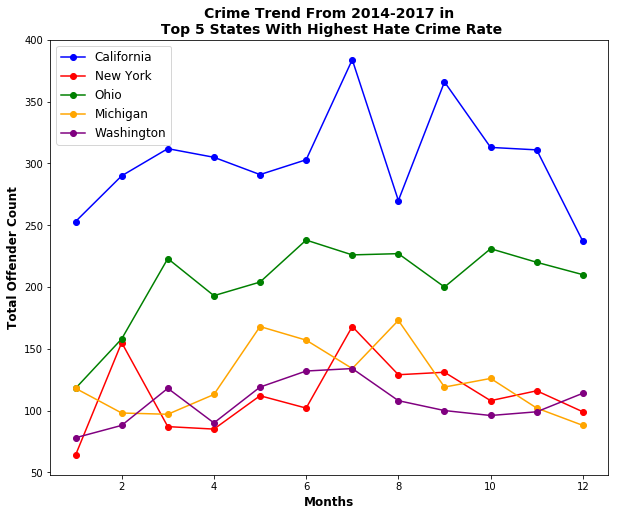

In [5]:
#create line graph for the 5 States with highest crime rate

#define plot area
plt.figure(figsize=(10,8))

#set x-axis
x_axis = np.arange(1,13)
#set y-axis for California
y_axis_ca = states_months_group.iloc[0:12:,2:3]
#set y-axis for New York
y_axis_ny = states_months_group.iloc[12:24:,2:3]
#set y-axis for Ohio
y_axis_oh = states_months_group.iloc[24:36:,2:3]
#set y-axis for Michigan
y_axis_mi = states_months_group.iloc[36:48:,2:3]
#set y-axis for Washington
y_axis_wa = states_months_group.iloc[48:60:,2:3]

#plot California line
ca_line, = plt.plot(x_axis, y_axis_ca, marker='o', color='blue', label='California')
#plot New York line
ny_line, = plt.plot(x_axis, y_axis_ny, marker='o', color='red', label="New York")
#plot Ohio line
oh_line, = plt.plot(x_axis, y_axis_oh, marker='o', color='green', label="Ohio")
#plot Michigan line
mi_line, = plt.plot(x_axis, y_axis_mi, marker='o', color='orange', label="Michigan")
#plot Washington line
wa_line, = plt.plot(x_axis, y_axis_wa, marker='o', color='purple', label="Washington")

#position the legend at the best location
plt.legend(loc="upper left", fontsize=12)

#label the chart
plt.title("Crime Trend From 2014-2017 in\n Top 5 States With Highest Hate Crime Rate", fontsize=14, fontweight="bold")
plt.xlabel("Months", fontsize=12, fontweight="bold")
plt.ylabel("Total Offender Count", fontsize=12, fontweight="bold")

#save figure
plt.savefig("Images/CrimeTrend_2014_2017_5states.png")